# EDSA - Climate Change Belief Analysis 2021
### Team TS5 Classification

<div align="center" style="width: 1000px; font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/CPNMorgan/Team_TS5_JHB_Classification/main/climat change.jpg"
     alt="Titanic"
     style="float: center; padding-bottom=0.5em"
     width=1000px/>

</div>

# Challenge Description

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

# Introduction

# Importing Packages

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
#from plotly import graph_objs as go
import seaborn as sns
from plotly import graph_objs as go

#nlp
import string
import re    #for regex
import nltk
from nltk.stem.porter import *
from nltk.corpus import stopwords
#import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
#from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from nltk.tokenize import TweetTokenizer   
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_union
from wordcloud import WordCloud 
from collections import Counter

#models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.utils import resample
from sklearn.metrics import classification_report

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [12]:
train_df = pd.read_csv('data/train.csv')
test_df = pd.read_csv('data/test.csv')
print('Data imported succesfully')

Data imported succesfully


In [13]:
train_df.head()

sentiment                                            message  tweetid
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221
1          1  It's not like we lack evidence of anthropogeni...   126103
2          2  RT @RawStory: Researchers say we have three ye...   698562
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954

In [14]:
test_df.head()

message  tweetid
0  Europe will now be looking to China to make su...   169760
1  Combine this with the polling of staffers re c...    35326
2  The scary, unimpeachable evidence that climate...   224985
3  @Karoli @morgfair @OsborneInk @dailykos \nPuti...   476263
4  RT @FakeWillMoore: 'Female orgasms cause globa...   872928

In [15]:
#check the shape of the data
train_df.shape, test_df.shape

((15819, 3), (10546, 2))

In [16]:
#unique sentiments
train_df['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [17]:
train_df['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [18]:
train_df['sentiment'].describe()

count    15819.000000
mean         0.917504
std          0.836537
min         -1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          2.000000
Name: sentiment, dtype: float64

In [19]:
#check for nulls
train_df.isnull().sum(), test_df.isnull().sum()

(sentiment    0
 message      0
 tweetid      0
 dtype: int64,
 message    0
 tweetid    0
 dtype: int64)

# CLEANING

In [20]:
# creating copy of train_df
df = train_df.copy()

### Removing Noise

In [21]:
# 1. Lowercase text
# 2. Remove whitespace
# 3. Remove numbers
# 4. Remove special characters
# 5. Remove emails
# 6. Remove stop words
# 7. Remove NAN
# 8. Remove weblinks
# 9. Expand contractions (if possible not necessary)
# 10. Tokenize

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer, LancasterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_fil(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(filtered_words)
    

In [22]:
def preprocess_stemm(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    return " ".join(stem_words)

In [23]:
def preprocess_lemm(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"") 
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words ]
    return " ".join(lemma_words)

In [24]:
df['clean_message']=df['message'].map(lambda s:preprocess_fil(s)) 

In [25]:
df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  
0  polyscimajor epa chief think carbon dioxide ma...  
1    like lack evidence anthropogenic global warming  
2  rawstory researchers say three years act clima...  
3  todayinmaker wired pivotal year war climate ch...  
4  soynoviodetodas racist sexist climate change d...

In [26]:
df['Lemma']=df['message'].map(lambda s:preprocess_lemm(s)) 
df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief think carbon dioxide ma...   
1    like lack evidence anthropogenic global warming   
2  rawstory researchers say three years act clima...   
3  todayinmaker wired pivotal year war climate ch...   
4  soynoviodetodas racist sexist climate change d...   

                                               Lemma  
0  polyscimajor epa chief think carbon dioxide ma...  
1    like lack evidence anthropogenic global warming  
2  rawstory researcher say three year act climate...  
3  todayinmaker wired pivotal year war climate ch...  
4  soynoviodetodas racist sexist climate change d...

In [27]:
df['stemm']=df['message'].map(lambda s:preprocess_stemm(s)) 
df.head()

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
2          2  RT @RawStory: Researchers say we have three ye...   698562   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   

                                       clean_message  \
0  polyscimajor epa chief think carbon dioxide ma...   
1    like lack evidence anthropogenic global warming   
2  rawstory researchers say three years act clima...   
3  todayinmaker wired pivotal year war climate ch...   
4  soynoviodetodas racist sexist climate change d...   

                                               Lemma  \
0  polyscimajor epa chief think carbon dioxide ma...   
1    like lack evidence anthropogenic global warming   
2  rawstory researcher say three year act climate...   
3  todayinmaker wired pivotal year war climate ch...   
4  soynoviodetodas racist sexist climate change d...   

                                               stemm  
0  polyscimajor epa chief think carbon dioxid mai...  
1             like lack evid anthropogen global warm  
2  rawstori research say three year act climat ch...  
3        todayinmak wire pivot year war climat chang  
4  soynoviodetoda racist sexist climat chang deni...

In [28]:
df['Lemma']==df['clean_message']

0         True
1         True
2        False
3         True
4        False
         ...  
15814    False
15815     True
15816    False
15817    False
15818     True
Length: 15819, dtype: bool

In [29]:
df['Lemma']==df['stemm']

0        False
1        False
2        False
3        False
4        False
         ...  
15814    False
15815    False
15816    False
15817    False
15818    False
Length: 15819, dtype: bool

## Exploratory Data Analysis (EDA)

 Exploratory Data Analysis (EDA) refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations

In [30]:
#copy_df = train_df.copy()
# Labeling the target
#train_df['sentiment'] = [['Negative(-1)', 'Neutral(0)', 'Positive(1)', 'News(2)'][x+1] for x in train_df['sentiment']]
#train_df.head()

#### Discreption of Sentiments:
- 2 News: the tweet links to factual news about climate change
- 1 Positive: the tweet supports the belief of man-made climate change
- 0 Neutral: the tweet neither supports nor refutes the belief of man-made climate change
- -1 Negative: the tweet does not believe in man-made climate change

In [31]:
dist = df.groupby('sentiment').count()['clean_message'].reset_index().sort_values(by='clean_message',ascending=True)
dist.style.background_gradient(cmap='Greens')

#### Count of words per sentiment

<AxesSubplot:xlabel='sentiment', ylabel='count'>

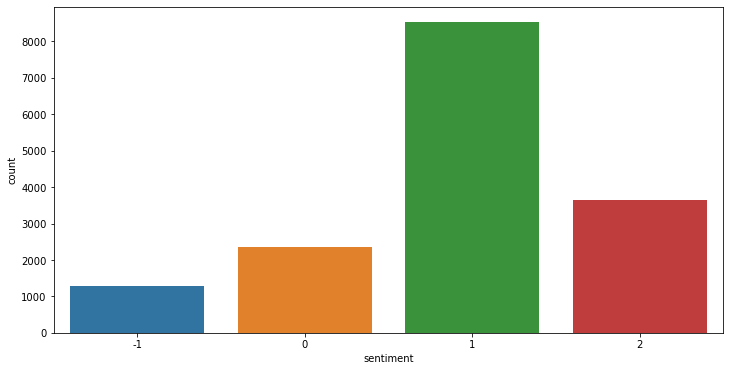

In [32]:
labels = []
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train_df)

### Observations
- The graph a bove shows that the words in the positive sentiment are higher compare to others, with 8000 words, were by the rest are below 4000


In [33]:
dist

sentiment  clean_message
0         -1           1296
1          0           2353
3          2           3640
2          1           8530

## Funnel chart to get more insight from sentiments

In [34]:
fig = go.Figure(go.Funnelarea(
    text =df.sentiment,
    values = dist.clean_message,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()


### Observation
- Negative(-1) Sentiment shows the less of counted words with the percentage of 8.19
- Neutral(0) shows 14.9 percents of counted words
- News(2) shows 23 percents of counted words
- And Positive comments shows the highest percentage of 53.9 of counted words

## checking average length of each sentiment catergory

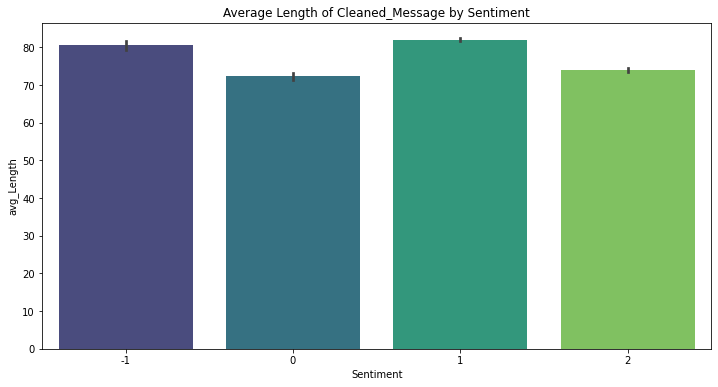

In [35]:
plt.figure(figsize=(12,6))
sns.barplot(x='sentiment', y=df['clean_message'].apply(len) ,data = df, palette='viridis')
plt.ylabel('avg_Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Cleaned_Message by Sentiment')
plt.show()

### Observations:
 -

In [36]:
tweetid = df['tweetid']
#df_test = df_test.drop('Index', axis = 1)

len(tweetid)

15819

## Most Common words in our Target-Selected Message

In [37]:
dataframe['Most common'] = df['clean_message'].apply(lambda x:str(x).split())
words = Counter([item for sublist in dataframe['Most common'] for item in sublist])
new = pd.DataFrame(words.most_common(10))
new.columns = ['Common_words','count']
new.style.background_gradient(cmap='Reds')

NameError: name 'dataframe' is not defined

In [ ]:
import plotly.express as px
fig = px.bar(new, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=600, height=600,color='Common_words')
fig.show()

### Observations:
 -

## Most common words Sentiments Wise

In [41]:
Positive = df[df['sentiment']==1]
Negative = df[df['sentiment']==-1]
Neutral = df[train_df['sentiment']==0]
News = df[df['sentiment']==2]


### Most common positive(1) words

In [46]:
#MosT common positive words
top = Counter([item for sublist in Positive['new_lis'] for item in sublist])
positive_w = pd.DataFrame(top.most_common(10))
positive_w.columns = ['Common_words','count']
positive_w.style.background_gradient(cmap='Greens')

KeyError: 'new_lis'

In [47]:
fig = px.bar(positive_w, x="count", y="Common_words", title='Most Commmon Positive(1) Words', orientation='h', 
             width=600, height=600,color='Common_words')
fig.show()

NameError: name 'px' is not defined

### Observations:
 -

### Most common negative words

In [48]:

top = Counter([item for sublist in Negative['new_lis'] for item in sublist])
negative = pd.DataFrame(top.most_common(10))
negative = negative.iloc[1:,:]
negative.columns = ['Common_words','count']
negative.style.background_gradient(cmap='Reds')

KeyError: 'new_lis'

In [49]:
fig = px.bar(negative, x="count", y="Common_words", title='Most Commmon Negative(-1) Words', orientation='h', 
             width=600, height=600,color='Common_words')
fig.show()

NameError: name 'px' is not defined

### Observation:
 -

### Most common neutral(0) words

In [50]:
top = Counter([item for sublist in Neutral['new_lis'] for item in sublist])
neutral = pd.DataFrame(top.most_common(10))
neutral = neutral.iloc[1:,:]
neutral.columns = ['Common_words','count']
neutral.style.background_gradient(cmap='Blues')

KeyError: 'new_lis'

In [51]:
fig = px.bar(neutral, x="count", y="Common_words", title='Most Commmon Neutral(0) Words', orientation='h', 
             width=600, height=600,color='Common_words')
fig.show()

NameError: name 'px' is not defined

### Observation:
 -

### Most common news(2) words

In [52]:
top = Counter([item for sublist in News['new_lis'] for item in sublist])
news = pd.DataFrame(top.most_common(10))
news = news.iloc[1:,:]
news.columns = ['Common_words','count']
news.style.background_gradient(cmap='Reds')

KeyError: 'new_lis'

In [53]:
fig = px.bar(news, x="count", y="Common_words", title='Most Commmon Neutral(0) Words', orientation='h', 
             width=600, height=600,color='Common_words')
fig.show()

NameError: name 'px' is not defined

### Observation:
 -

### Counting number of Emojis used in the texts

In [54]:
!pip install emoji
import emoji
emojis_df=[]
for string in df['message']:
    my_str = str(string)
    for each in my_str:
        if each in emoji.UNICODE_EMOJI['en'].keys():
            emojis_df.append(each)
freq = (Counter(i for sub in emojis_df for i in set(sub))) 
sort_orders = sorted(freq.items(), key=lambda x: x[1], reverse=True)

In [55]:
print(sort_orders)

[('😂', 28), ('™', 13), ('🤔', 11), ('🙄', 11), ('❤', 11), ('🔥', 10), ('❄', 8), ('🤣', 8), ('🌍', 7), ('➡', 7), ('🌎', 6), ('☀', 6), ('😳', 5), ('🏽', 5), ('💀', 5), ('▶', 5), ('🙃', 4), ('⚡', 4), ('😢', 4), ('✔', 4), ('♂', 3), ('©', 3), ('😜', 3), ('👏', 3), ('♀', 3), ('✨', 3), ('😒', 2), ('🏻', 2), ('🏼', 2), ('🚨', 2), ('🌏', 2), ('😔', 2), ('😩', 2), ('🤐', 2), ('♥', 2), ('😄', 2), ('🎵', 2), ('😁', 2), ('☕', 2), ('😅', 2), ('😍', 2), ('‼', 2), ('😲', 2), ('✈', 2), ('💚', 2), ('🤦', 1), ('✊', 1), ('😑', 1), ('☔', 1), ('👎', 1), ('🙏', 1), ('😇', 1), ('🙋', 1), ('🔫', 1), ('🤰', 1), ('🌼', 1), ('😞', 1), ('😴', 1), ('☢', 1), ('⛰', 1), ('☹', 1), ('😫', 1), ('⏩', 1), ('😊', 1), ('⏰', 1), ('🤗', 1), ('🌴', 1), ('🌳', 1), ('🌲', 1), ('🌻', 1), ('🍄', 1), ('🌤', 1), ('🌱', 1), ('🦋', 1), ('🐞', 1), ('🐾', 1), ('🌈', 1), ('🏔', 1), ('🙁', 1), ('🏊', 1), ('☝', 1), ('♋', 1), ('💍', 1), ('👌', 1), ('🤡', 1), ('👀', 1), ('👍', 1), ('🖐', 1), ('👑', 1), ('😎', 1), ('📝', 1), ('☎', 1), ('⬅', 1), ('🦄', 1), ('✅', 1), ('📢', 1), ('😖', 1), ('😬', 1), ('🙂', 1), ('🐝

### Observation:
- The most common emoji is the 'face with tears of joy' is an emoji featuring a jovial face laughing, while also crying out tears
- We have other emjis that illustrate the impacts of global warmaing on weather and climate change, e.g 'earth,fire,flowers and snowflake'

### WordCloud of most common positive words used.


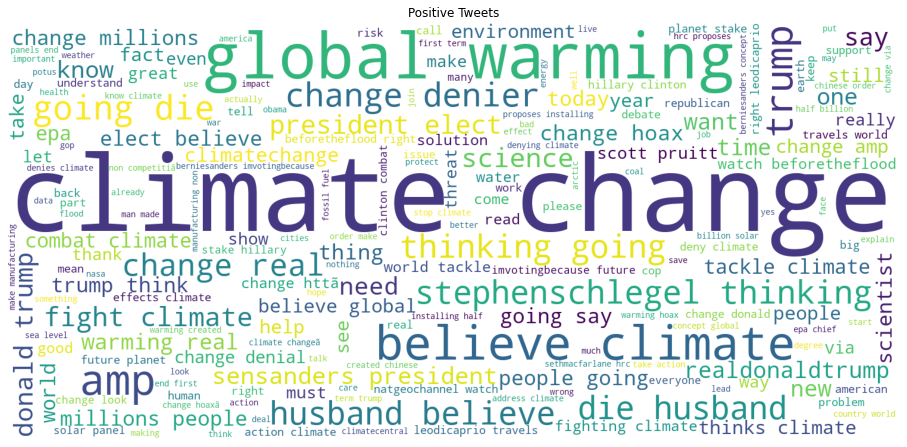

In [56]:
wordcloud = WordCloud(max_font_size=250,background_color='white', width=1500, height=700).generate(' '.join(Positive[Positive['sentiment'] == 1]
                                          ['clean_message']))
plt.figure( figsize=(16,10))
plt.imshow(wordcloud)
plt.title('Positive Tweets')
plt.axis("off")
plt.show()

### Observations:
 -

### WordCloud of most common negative words used

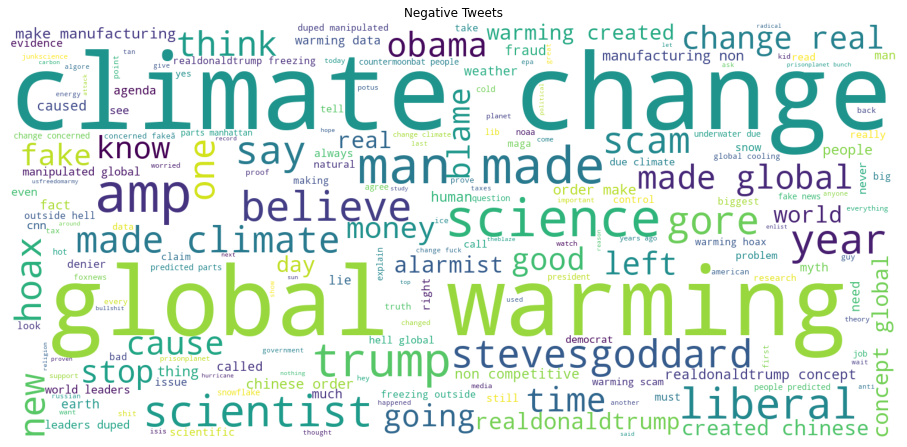

In [57]:
wordcloud = WordCloud(max_font_size=250,background_color='white', width=1500, height=700).generate(' '.join(Negative[Negative['sentiment'] == -1]
                                          ['clean_message']))
plt.figure( figsize=(16,10))
plt.imshow(wordcloud)
plt.title('Negative Tweets')
plt.axis("off")
plt.show()

### Observations:
 -

### WordCloud of most common neutral words used

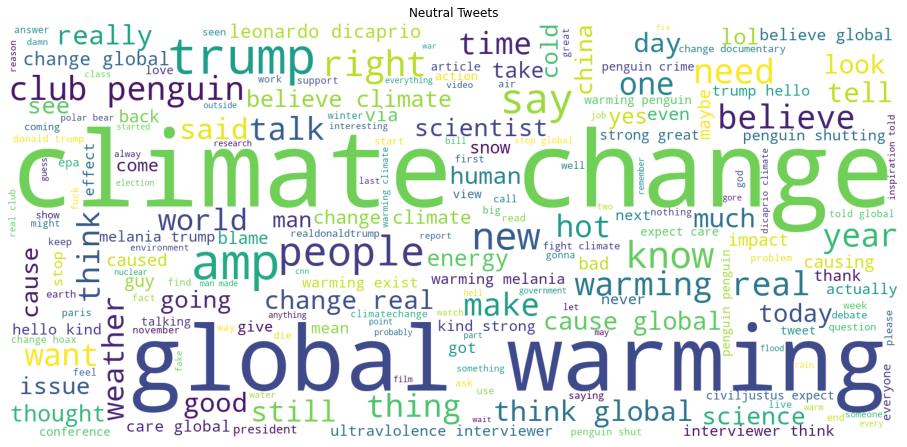

In [58]:
wordcloud = WordCloud(max_font_size=250,background_color='white', width=1500, height=700).generate(' '.join(Neutral[Neutral['sentiment'] == 0]
                                          ['clean_message']))
plt.figure( figsize=(16,10))
plt.imshow(wordcloud)
plt.title('Neutral Tweets')
plt.axis("off")
plt.show()

### Observations:
 -

### WordCloud of most common neutral words used

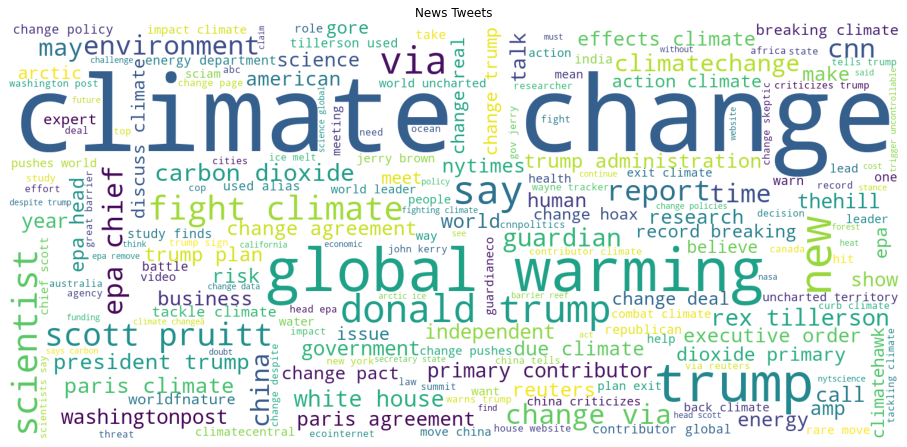

In [59]:
wordcloud = WordCloud(max_font_size=250,background_color='white', width=1500, height=700).generate(' '.join(News[News['sentiment'] == 2]
                                          ['clean_message']))
plt.figure( figsize=(16,10))
plt.imshow(wordcloud)
plt.title('News Tweets')
plt.axis("off")
plt.show()

### WordCloud of most common words used 'Overall'
- Wordcloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance

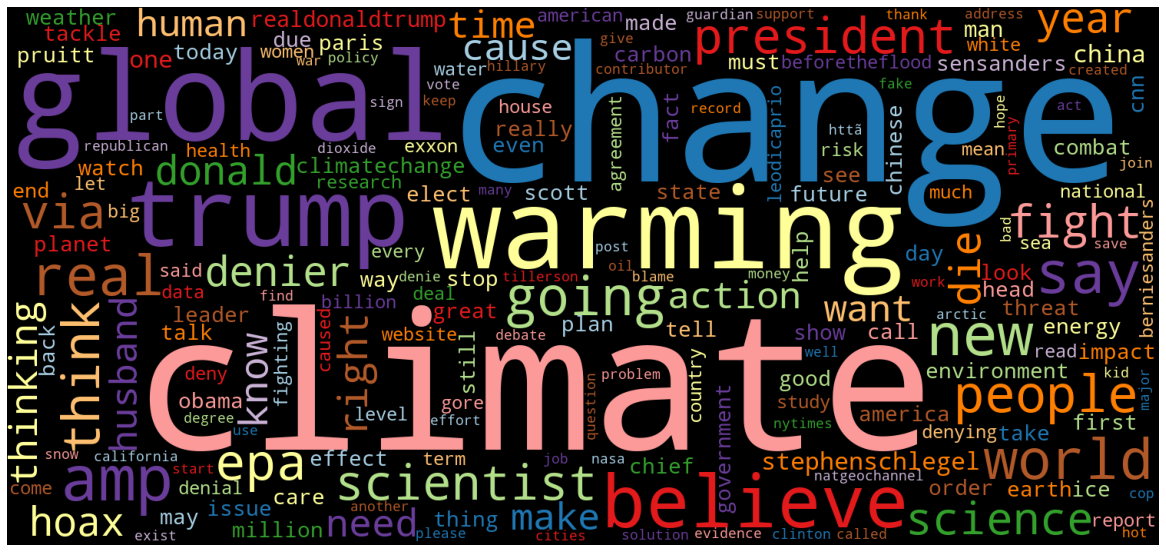

In [60]:
train_msg = " ".join(tweet for tweet in df.clean_message)
train_wordcloud = WordCloud(max_font_size=250,
                            background_color="black",
                            width=1500,
                            height=700,
                            collocations=False,
                            colormap='Paired').generate(train_msg)
plt.figure(figsize=(16, 10))
plt.imshow(train_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### Observation:
 - 

## Balancing Data

In [65]:

# Separate minority and majority classes
majority_sentiment = df[df['sentiment']== 1]
minority_sentiment_0 = df[df['sentiment']== 0]
minority_sentiment_2 = df[df['sentiment']== 2]
minority_sentiment_neg1 = df[df['sentiment'] == -1]

# Upsample minority

In [66]:
minority_sentiment_0_minority = resample(minority_sentiment_0,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=len(majority_sentiment), # match number in minority class
                          random_state=42) # reproducible results

minority_sentiment_2_minority = resample(minority_sentiment_2,
                                         replace = True,
                                         n_samples=len(majority_sentiment),
                                         random_state=42)

minority_sentiment_neg1_minority = resample(minority_sentiment_neg1,
                                   replace=True,
                                   n_samples=len(majority_sentiment),
                                   random_state=42)

# Combine upsampled minority class with majority class
df2 = pd.concat([majority_sentiment, minority_sentiment_0_minority,minority_sentiment_2_minority,minority_sentiment_neg1_minority])

# Check new class counts
df2['sentiment'].value_counts()

-1    8530
 2    8530
 1    8530
 0    8530
Name: sentiment, dtype: int64

## downsample 

In [67]:
# Separate minority and majority classes
majority_sentiment = df[df['sentiment']== 1]
minority_sentiment_0 = df[df['sentiment']== 0]
minority_sentiment_2 = df[df['sentiment']== 2]
minority_sentiment_neg1 = df[df['sentiment'] == -1]


Pro = resample(majority_sentiment,##PRO,
                          replace=False, # sample with replacement (we need to duplicate observations)
                          n_samples=len(minority_sentiment_neg1), # match number in minority class
                          random_state=42) # reproducible results

Neutral = resample(minority_sentiment_0,##NEUTRAL,
                                         replace = False,
                                         n_samples=len(minority_sentiment_neg1),
                                         random_state=42)

news = resample(minority_sentiment_2,##NEWS,
                                   replace=False,
                                   n_samples=len(minority_sentiment_neg1),
                                   random_state=42)

# Combine upsampled minority class with majority class
df_down = pd.concat([Pro,Neutral,news,minority_sentiment_neg1])

# Check new class counts
df_down['sentiment'].value_counts()

-1    1296
 2    1296
 1    1296
 0    1296
Name: sentiment, dtype: int64

In [68]:
#n_samples=len(Anti)

In [69]:
# Show the table of balanced data in clean_text from each language Id
dist = df2.groupby('sentiment').count()['clean_message'].reset_index().sort_values(by='clean_message',ascending=True)

In [70]:
dist

sentiment  clean_message
0         -1           8530
1          0           8530
2          1           8530
3          2           8530

# UP AND DOWN

In [71]:
# Separate minority and majority classes
majority_sentiment = df[df['sentiment']== 1]
minority_sentiment_0 = df[df['sentiment']== 0]
minority_sentiment_2 = df[df['sentiment']== 2]
minority_sentiment_neg1 = df[df['sentiment'] == -1]

# Downsample majority
class_size=round(len(majority_sentiment)/2)
Pro_downsampled2 = resample(majority_sentiment,
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=class_size, # match number in class size
                          random_state=30) # reproducible results

# Combine downsampled majority class with minority class
#downsampled = pd.concat([not_spam_downsampled, spam])

# Upsample minority
News_upsampled = resample(minority_sentiment_2,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in  class size
                          random_state=31) # reproducible results

Neutral_upsampled = resample(minority_sentiment_0,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in  class size
                          random_state=32) # reproducible results

Anti_upsampled = resample(minority_sentiment_neg1,
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in  class size
                          random_state=33) # reproducible results



# Combine upsampled minority class with majority class
upsampled_downsampled = pd.concat([News_upsampled,Neutral_upsampled,Anti_upsampled, Pro_downsampled2])
# Check new class counts
upsampled_downsampled['sentiment'].value_counts()

-1    4265
 2    4265
 1    4265
 0    4265
Name: sentiment, dtype: int64

In [72]:
upsampled_downsampled.head(2)

sentiment                                            message  tweetid  \
2944          2  City of Montreal to buy refrigerated skating r...   445397   
8776          2  Trump to sign sweeping rollback of Obama-era c...   245157   

                                          clean_message  \
2944  city montreal buy refrigerated skating rinks c...   
8776  trump sign sweeping rollback obama era climate...   

                                                  Lemma  \
2944  city montreal buy refrigerated skating rink co...   
8776  trump sign sweeping rollback obama era climate...   

                                                  stemm  
2944  citi montreal buy refriger skate rink counter ...  
8776  trump sign sweep rollback obama era climat cha...

## Data Preprosessing

### Train (Validation) Test Split

In [73]:
df['stemm']#Unbalanced

0        polyscimajor epa chief think carbon dioxid mai...
1                   like lack evid anthropogen global warm
2        rawstori research say three year act climat ch...
3              todayinmak wire pivot year war climat chang
4        soynoviodetoda racist sexist climat chang deni...
                               ...                        
15814    ezlusztig took materi global warm lgbt right h...
15815    washingtonpost climat chang could break millio...
15816    notiven nytimesworld trump actual believ clima...
15817    sarasmil hey liber climat chang crap hoax tie ...
15818    chet_cannon kurteichenwald climat chang equat ...
Name: stemm, Length: 15819, dtype: object

In [74]:
df2.head()# Upsampled balanced

sentiment                                            message  tweetid  \
0          1  PolySciMajor EPA chief doesn't think carbon di...   625221   
1          1  It's not like we lack evidence of anthropogeni...   126103   
3          1  #TodayinMaker# WIRED : 2016 was a pivotal year...   573736   
4          1  RT @SoyNovioDeTodas: It's 2016, and a racist, ...   466954   
5          1  Worth a read whether you do or don't believe i...   425577   

                                       clean_message  \
0  polyscimajor epa chief think carbon dioxide ma...   
1    like lack evidence anthropogenic global warming   
3  todayinmaker wired pivotal year war climate ch...   
4  soynoviodetodas racist sexist climate change d...   
5          worth read whether believe climate change   

                                               Lemma  \
0  polyscimajor epa chief think carbon dioxide ma...   
1    like lack evidence anthropogenic global warming   
3  todayinmaker wired pivotal year war climate ch...   
4  soynoviodetodas racist sexist climate change d...   
5          worth read whether believe climate change   

                                               stemm  
0  polyscimajor epa chief think carbon dioxid mai...  
1             like lack evid anthropogen global warm  
3        todayinmak wire pivot year war climat chang  
4  soynoviodetoda racist sexist climat chang deni...  
5             worth read whether believ climat chang

In [75]:
X = df2['clean_message']
y = df2['sentiment']

### Upsampling_Downsampling our data makes model performance worse

X = upsampled_downsampled['clean_message']
y = upsampled_downsampled['sentiment']

### Down sampling our data makes model performance worst

we have very little training data here

X = df_down['clean_message']
y = df_down['sentiment']

In [76]:
df2.shape

(34120, 6)

# Train_Test Split 

In [77]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.1, random_state=42)



# Classification Models 
[Back to Table of Contents](#toc)

In [78]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
clf_dict = [LinearSVC(random_state=42), KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(max_depth=5),
                        RandomForestClassifier(max_depth=5, n_estimators=10,
                        max_features=1), ComplementNB(), MultinomialNB(), AdaBoostClassifier()
                         ]

In [79]:
def modeling(clf_dict, X_train, y_train, X_val, y_val):

    models = {}
    for clf in clf_dict:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1, max_df=0.1, ngram_range=(1, 2))),('clf', clf)])
        
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_val)

        # Output for each model
        models[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_val,predictions,average='macro'),
            'F1-Mccuracy': metrics.f1_score(y_val, predictions,average='micro'),
            'F1-Weighted': metrics.f1_score(y_val,predictions,average='weighted')}

    return pd.DataFrame.from_dict(models, orient='index')

In [80]:
# Displaying all the models
classi = modeling(clf_dict, X_train, y_train, X_val, y_val)
display_df = classi.sort_values('F1-Macro', ascending=False)
display_df

F1-Macro  F1-Mccuracy  F1-Weighted
LinearSVC               0.942117     0.943435     0.942331
MultinomialNB           0.894617     0.899179     0.894781
ComplementNB            0.879735     0.886870     0.879920
KNeighborsClassifier    0.656320     0.693435     0.657732
AdaBoostClassifier      0.490906     0.502931     0.491209
DecisionTreeClassifier  0.240477     0.319754     0.240088
RandomForestClassifier  0.110546     0.259965     0.113312

In [81]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

### Running a Single model

In [91]:
from sklearn.pipeline import Pipeline
param_grid = {'alpha': [0.1, 1, 5, 11]}  # parameter grid

pipeline = Pipeline([('tfidf', TfidfVectorizer(min_df=2, max_df=0.9, ngram_range=(1, 3))), ('mnb', GridSearchCV(MultinomialNB(),  param_grid=param_grid, cv=5, n_jobs=-1, scoring='f1_weighted'))])


In [92]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(max_df=0.9, min_df=2, ngram_range=(1, 3))),
                ('mnb',
                 GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
                              param_grid={'alpha': [0.1, 1, 5, 11]},
                              scoring='f1_weighted'))])

In [93]:
predictions = pipeline.predict(X_val)

In [94]:
print(classification_report(predictions,y_val))

              precision    recall  f1-score   support

          -1       0.99      0.97      0.98       901
           0       0.92      0.95      0.93       806
           1       0.89      0.86      0.87       880
           2       0.91      0.93      0.92       825

    accuracy                           0.93      3412
   macro avg       0.93      0.93      0.93      3412
weighted avg       0.93      0.93      0.93      3412



In [95]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

## Prediction Submission csv

In [96]:
LSVC = pd.DataFrame(data={'tweetid': test_df['tweetid'],'sentiment': predictions})

ValueError: array length 3412 does not match index length 10546

In [97]:
LSVC.to_csv("GridSearch_MultNB_Clean_message.csv", index=False)
#OUR MODEL IMPROVED BY USING STEMMA BETTER THAN LEMMA AND WE USED UPSAMPLED DATA WITH TRAINING DATA OF 90%

NameError: name 'LSVC' is not defined

## References
- Websites used for insipiration

- analyticsvidhya: https://www.analyticsvidhya.com/blog/2018/07/hands-on-sentiment-analysis-dataset-python/
- towardsdatascience: https://towardsdatascience.com/how-to-efficiently-remove-punctuations-from-a-string-899ad4a059fb
- codegrepper:  https://www.codegrepper.com/code-examples/python/pandas+series+remove+punctuation
- https://stackoverflow.com/questions/54396405/how-can-i-preprocess-nlp-text-lowercase-remove-special-characters-remove-numb
